In [1]:
import cv2
import numpy as np
from PIL import Image

In [2]:
def max_area_contour(contours):
    cnt = contours[0]
    max_area = cv2.contourArea(cnt)

    for cont in contours:
        if cv2.contourArea(cont) > max_area:
            cnt = cont
            max_area = cv2.contourArea(cont)
    return cnt

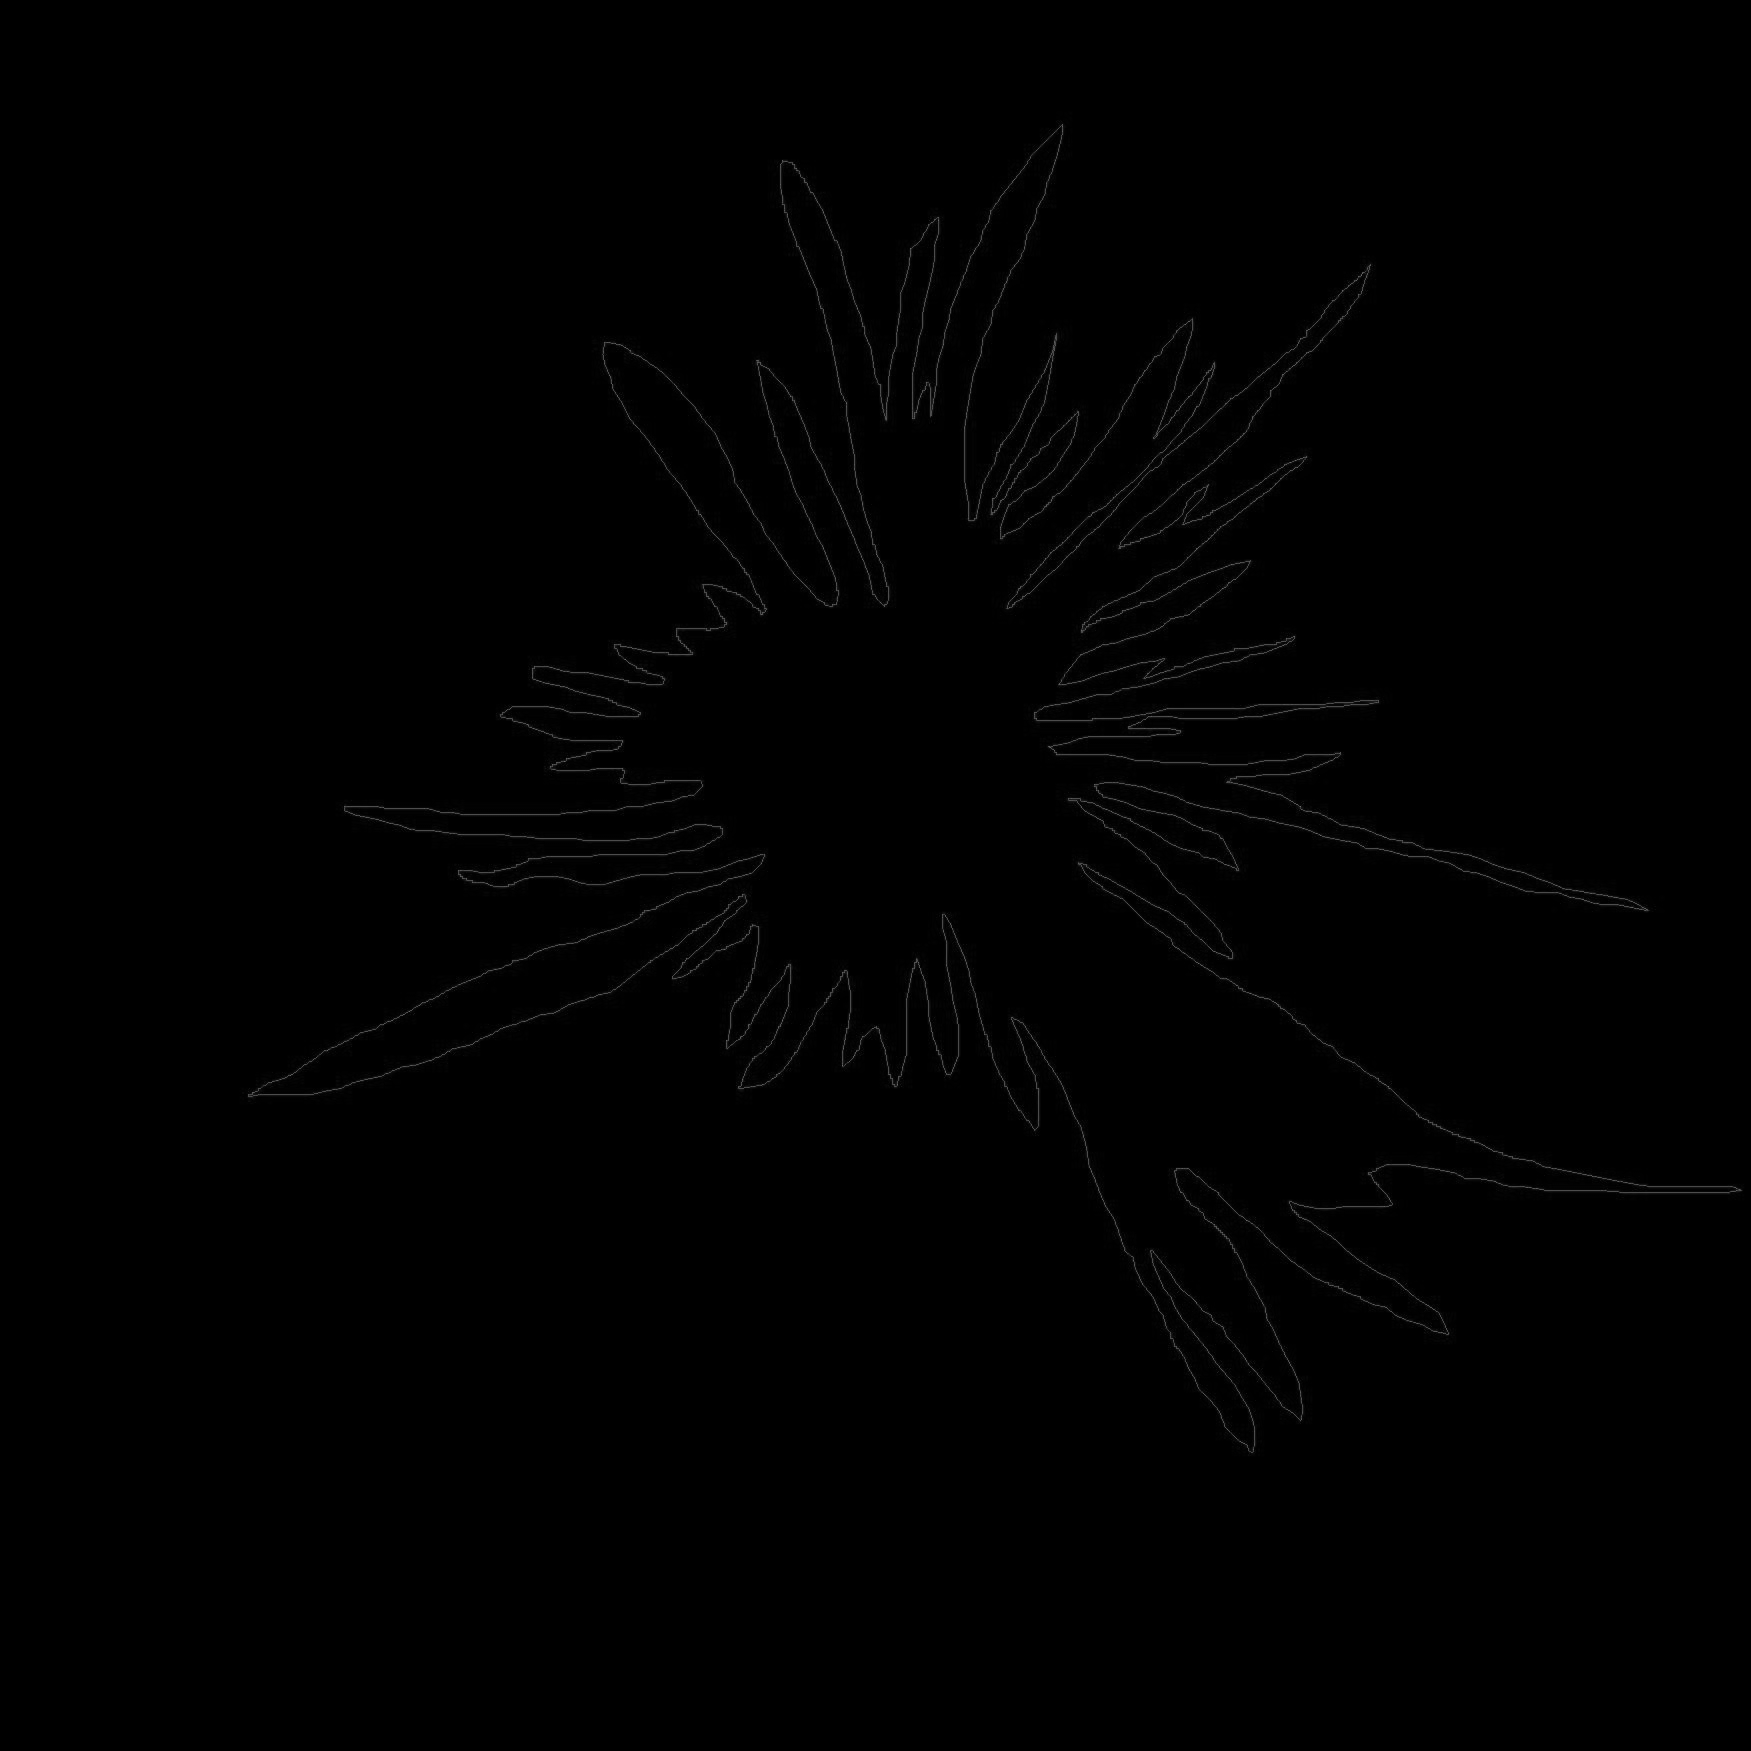

In [10]:
img = cv2.imread('C55_97LOROI.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
Image.fromarray(img)

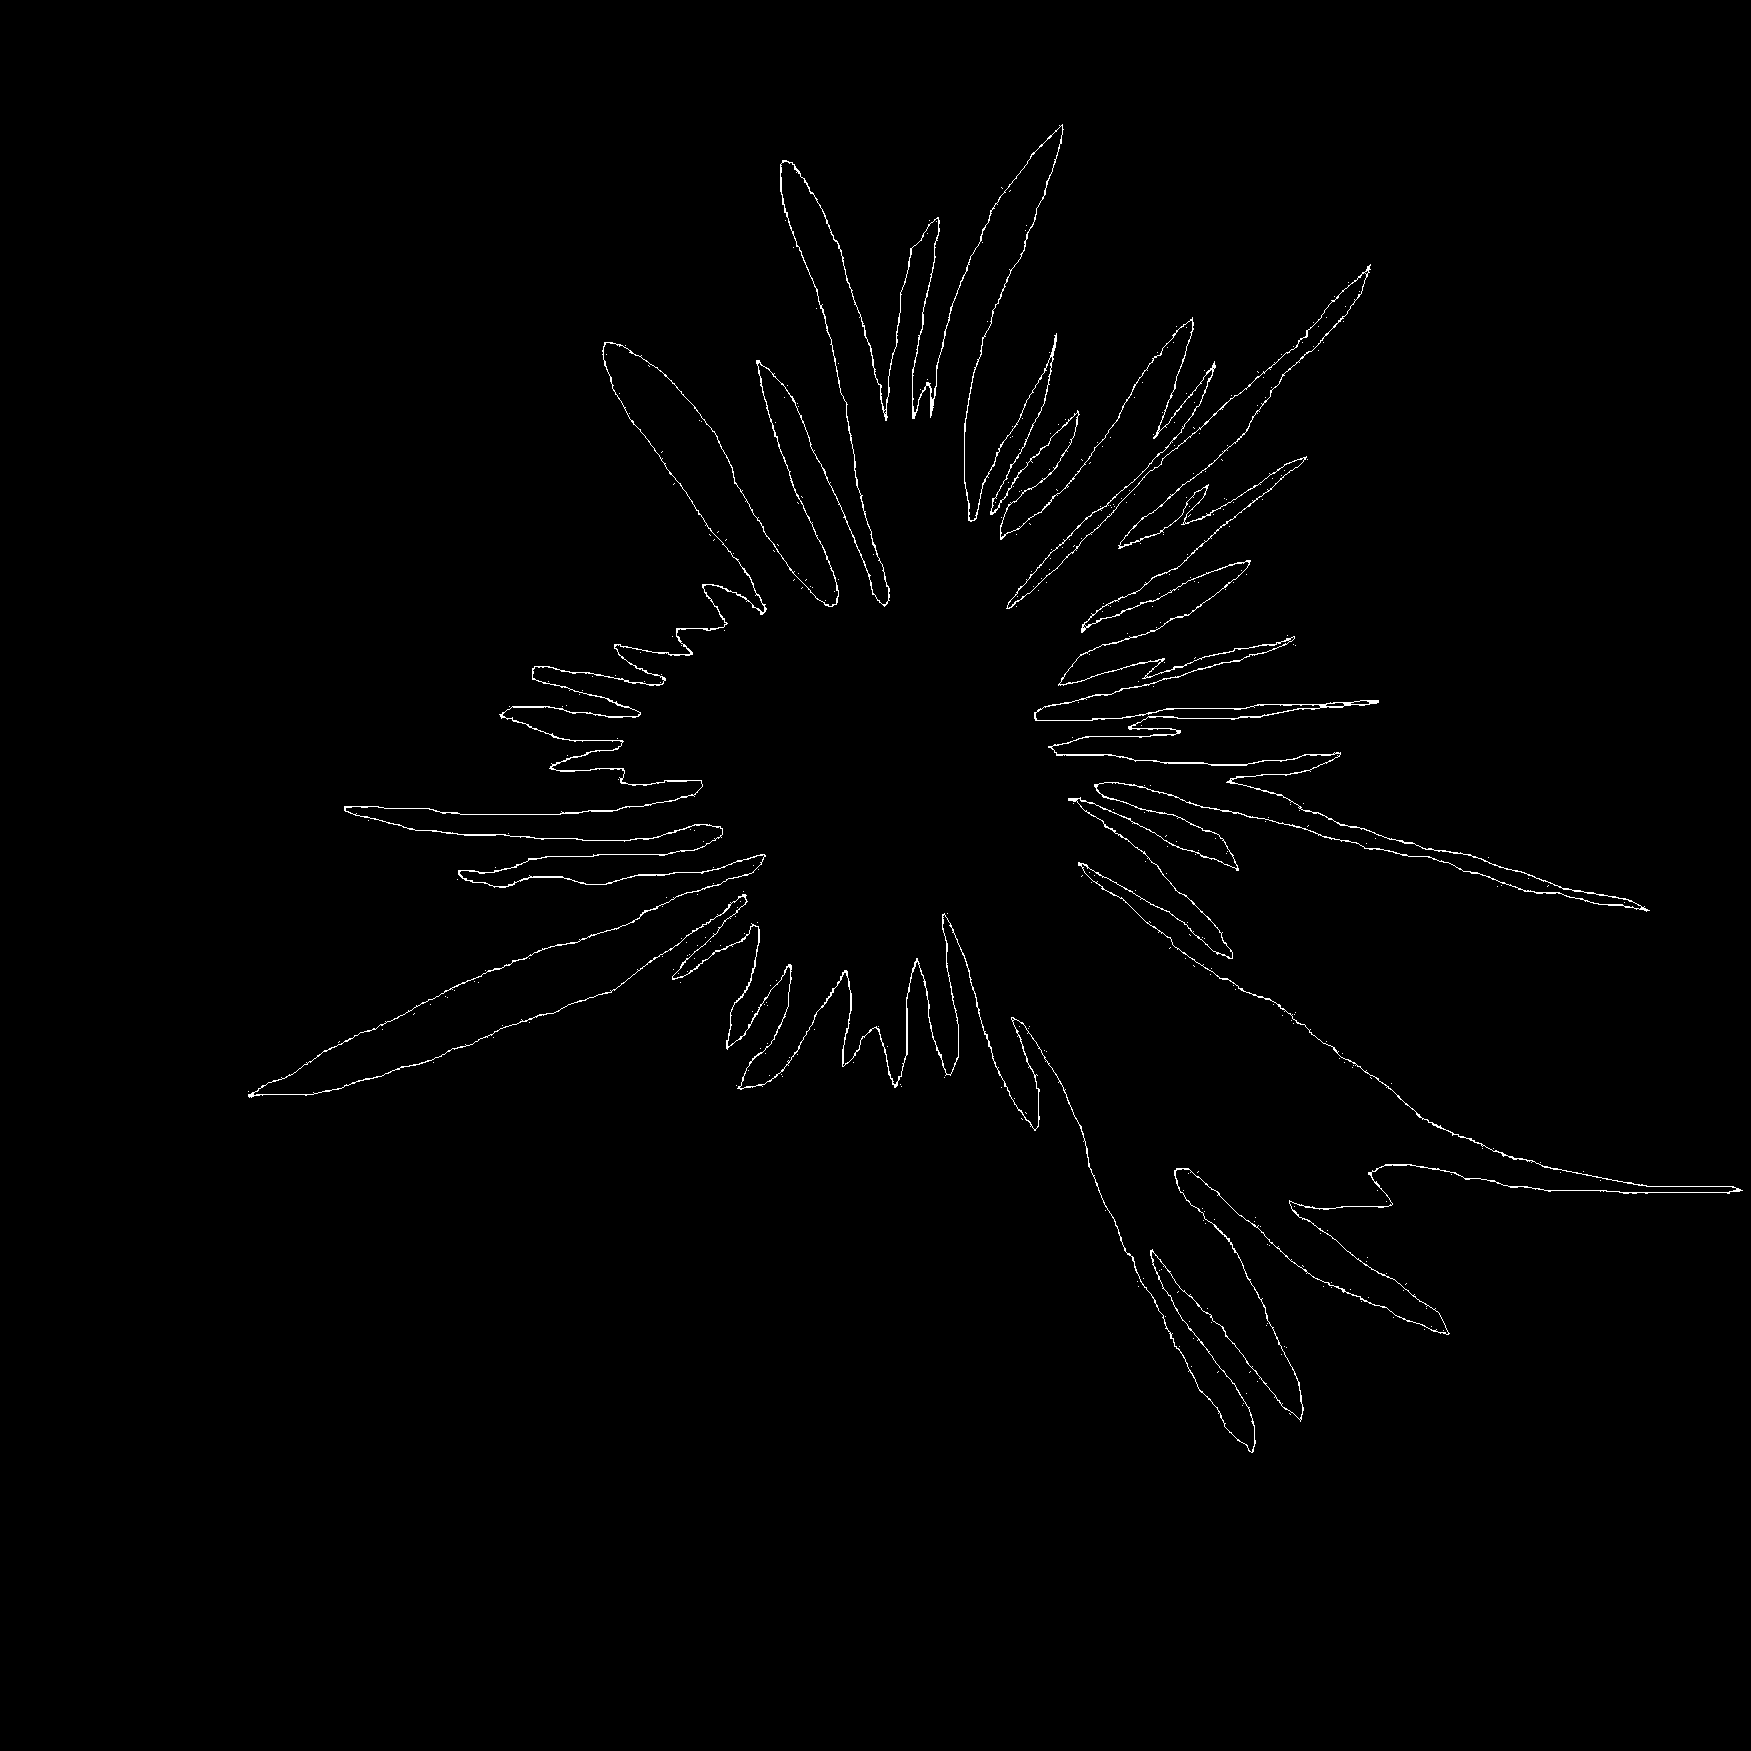

In [18]:
ret, thresh = cv2.threshold(img, 20, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = max_area_contour(contours)
Image.fromarray(thresh)

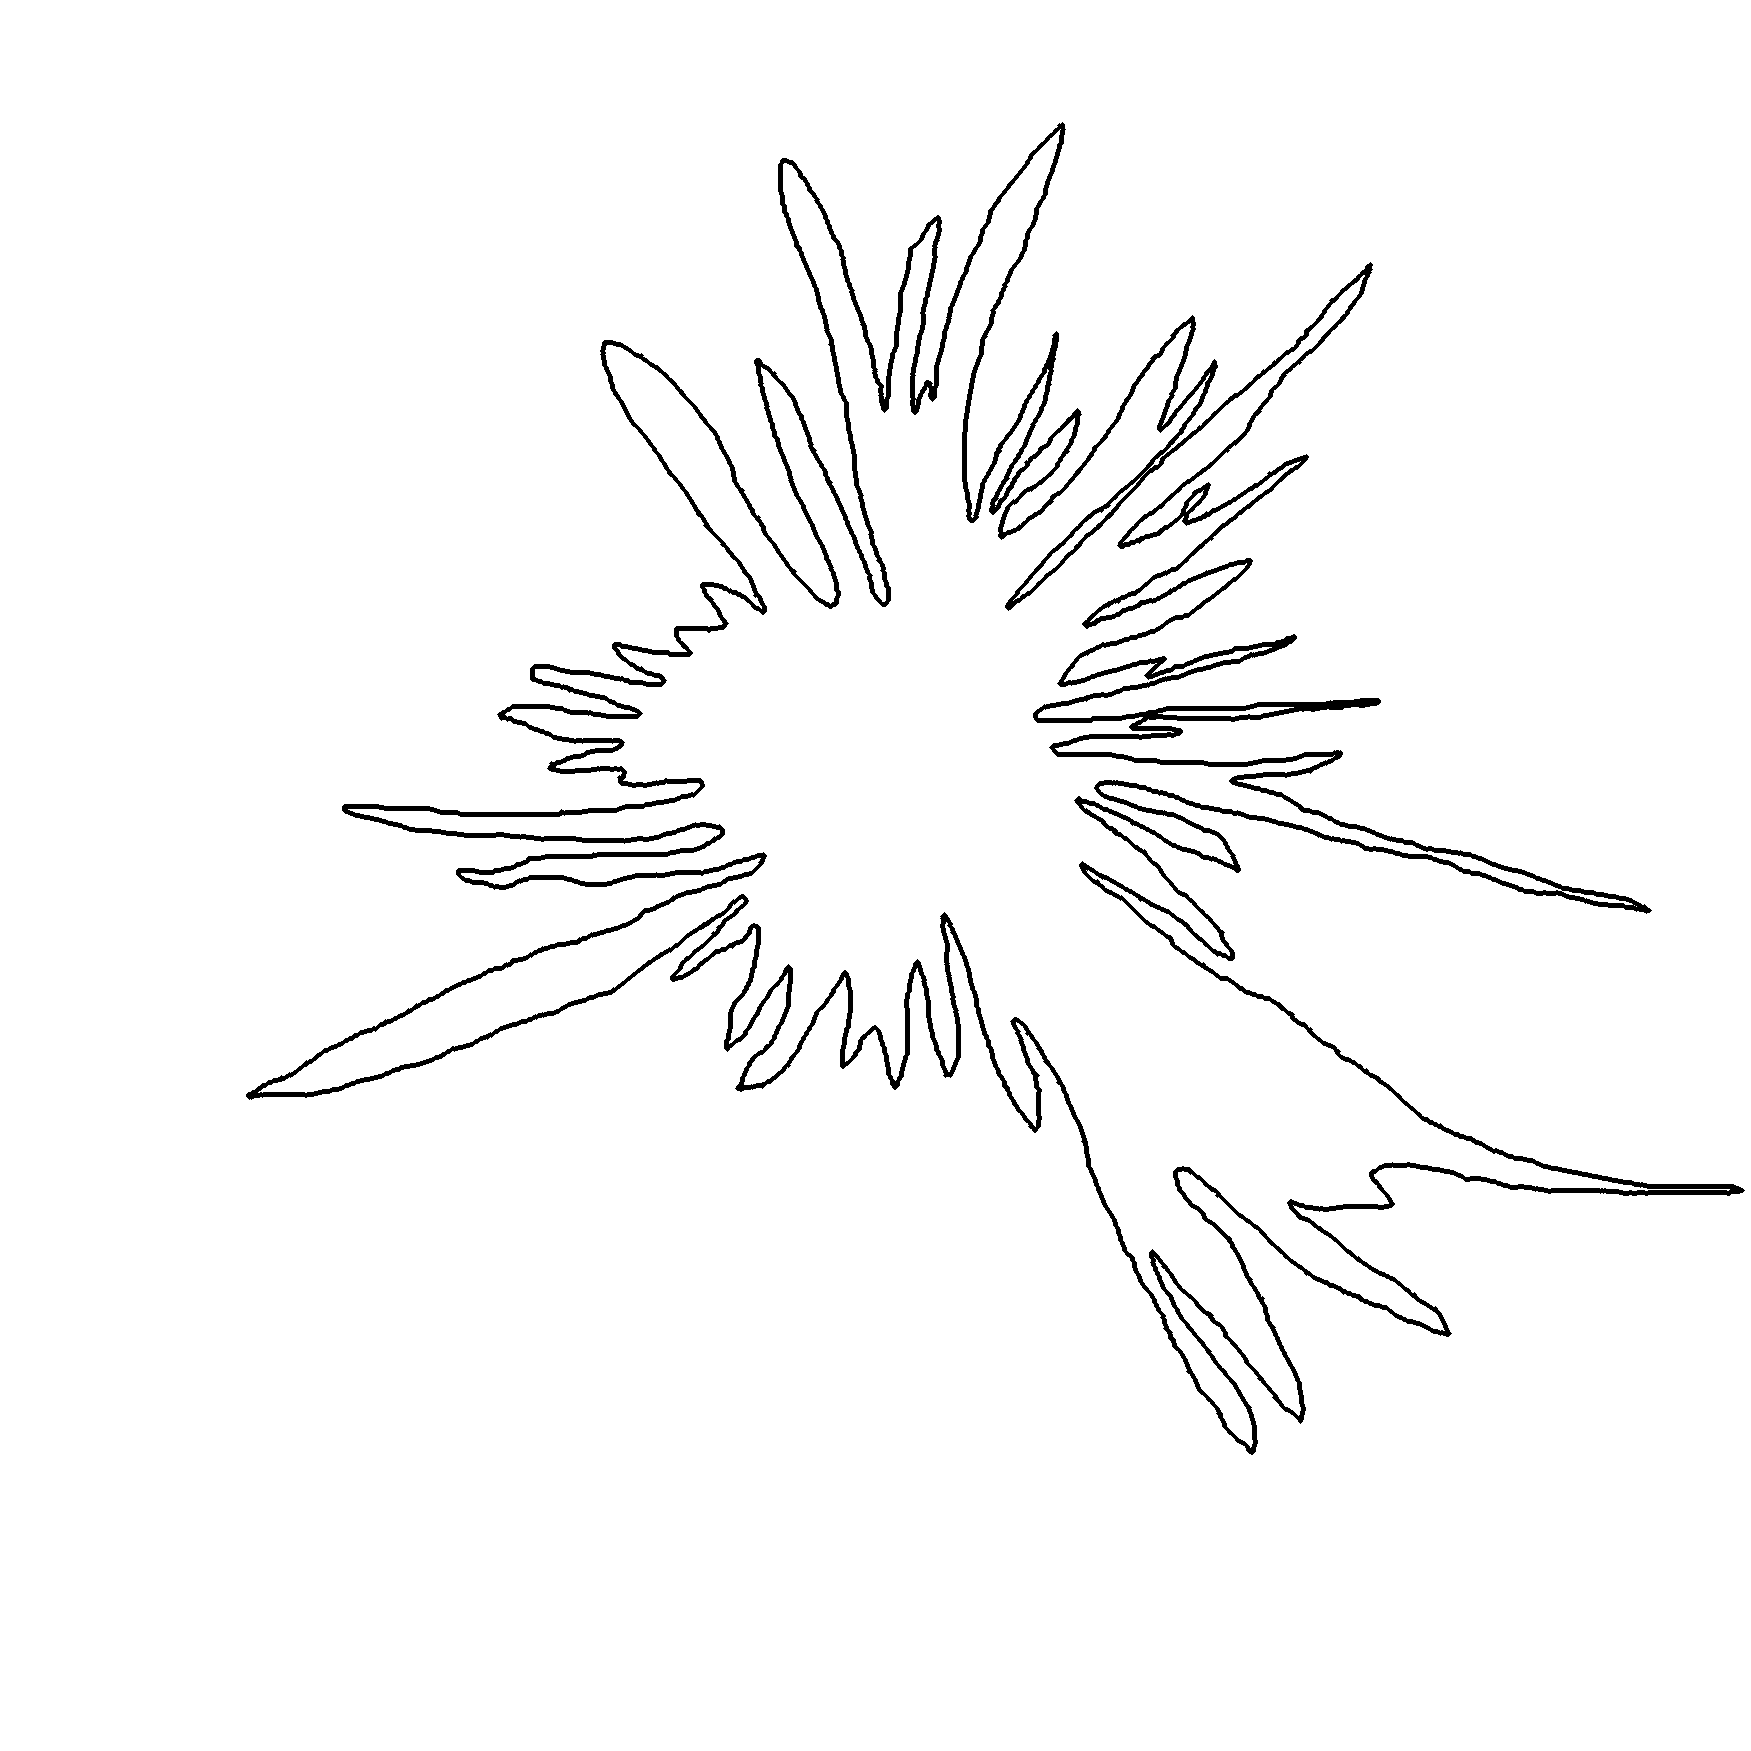

In [19]:
boundary = np.full(img.shape, 255, dtype='uint8')
cv2.drawContours(boundary, [cnt], 0, (0, 0, 0), 3)
cv2.imwrite('boundary.png', boundary)
Image.fromarray(boundary)

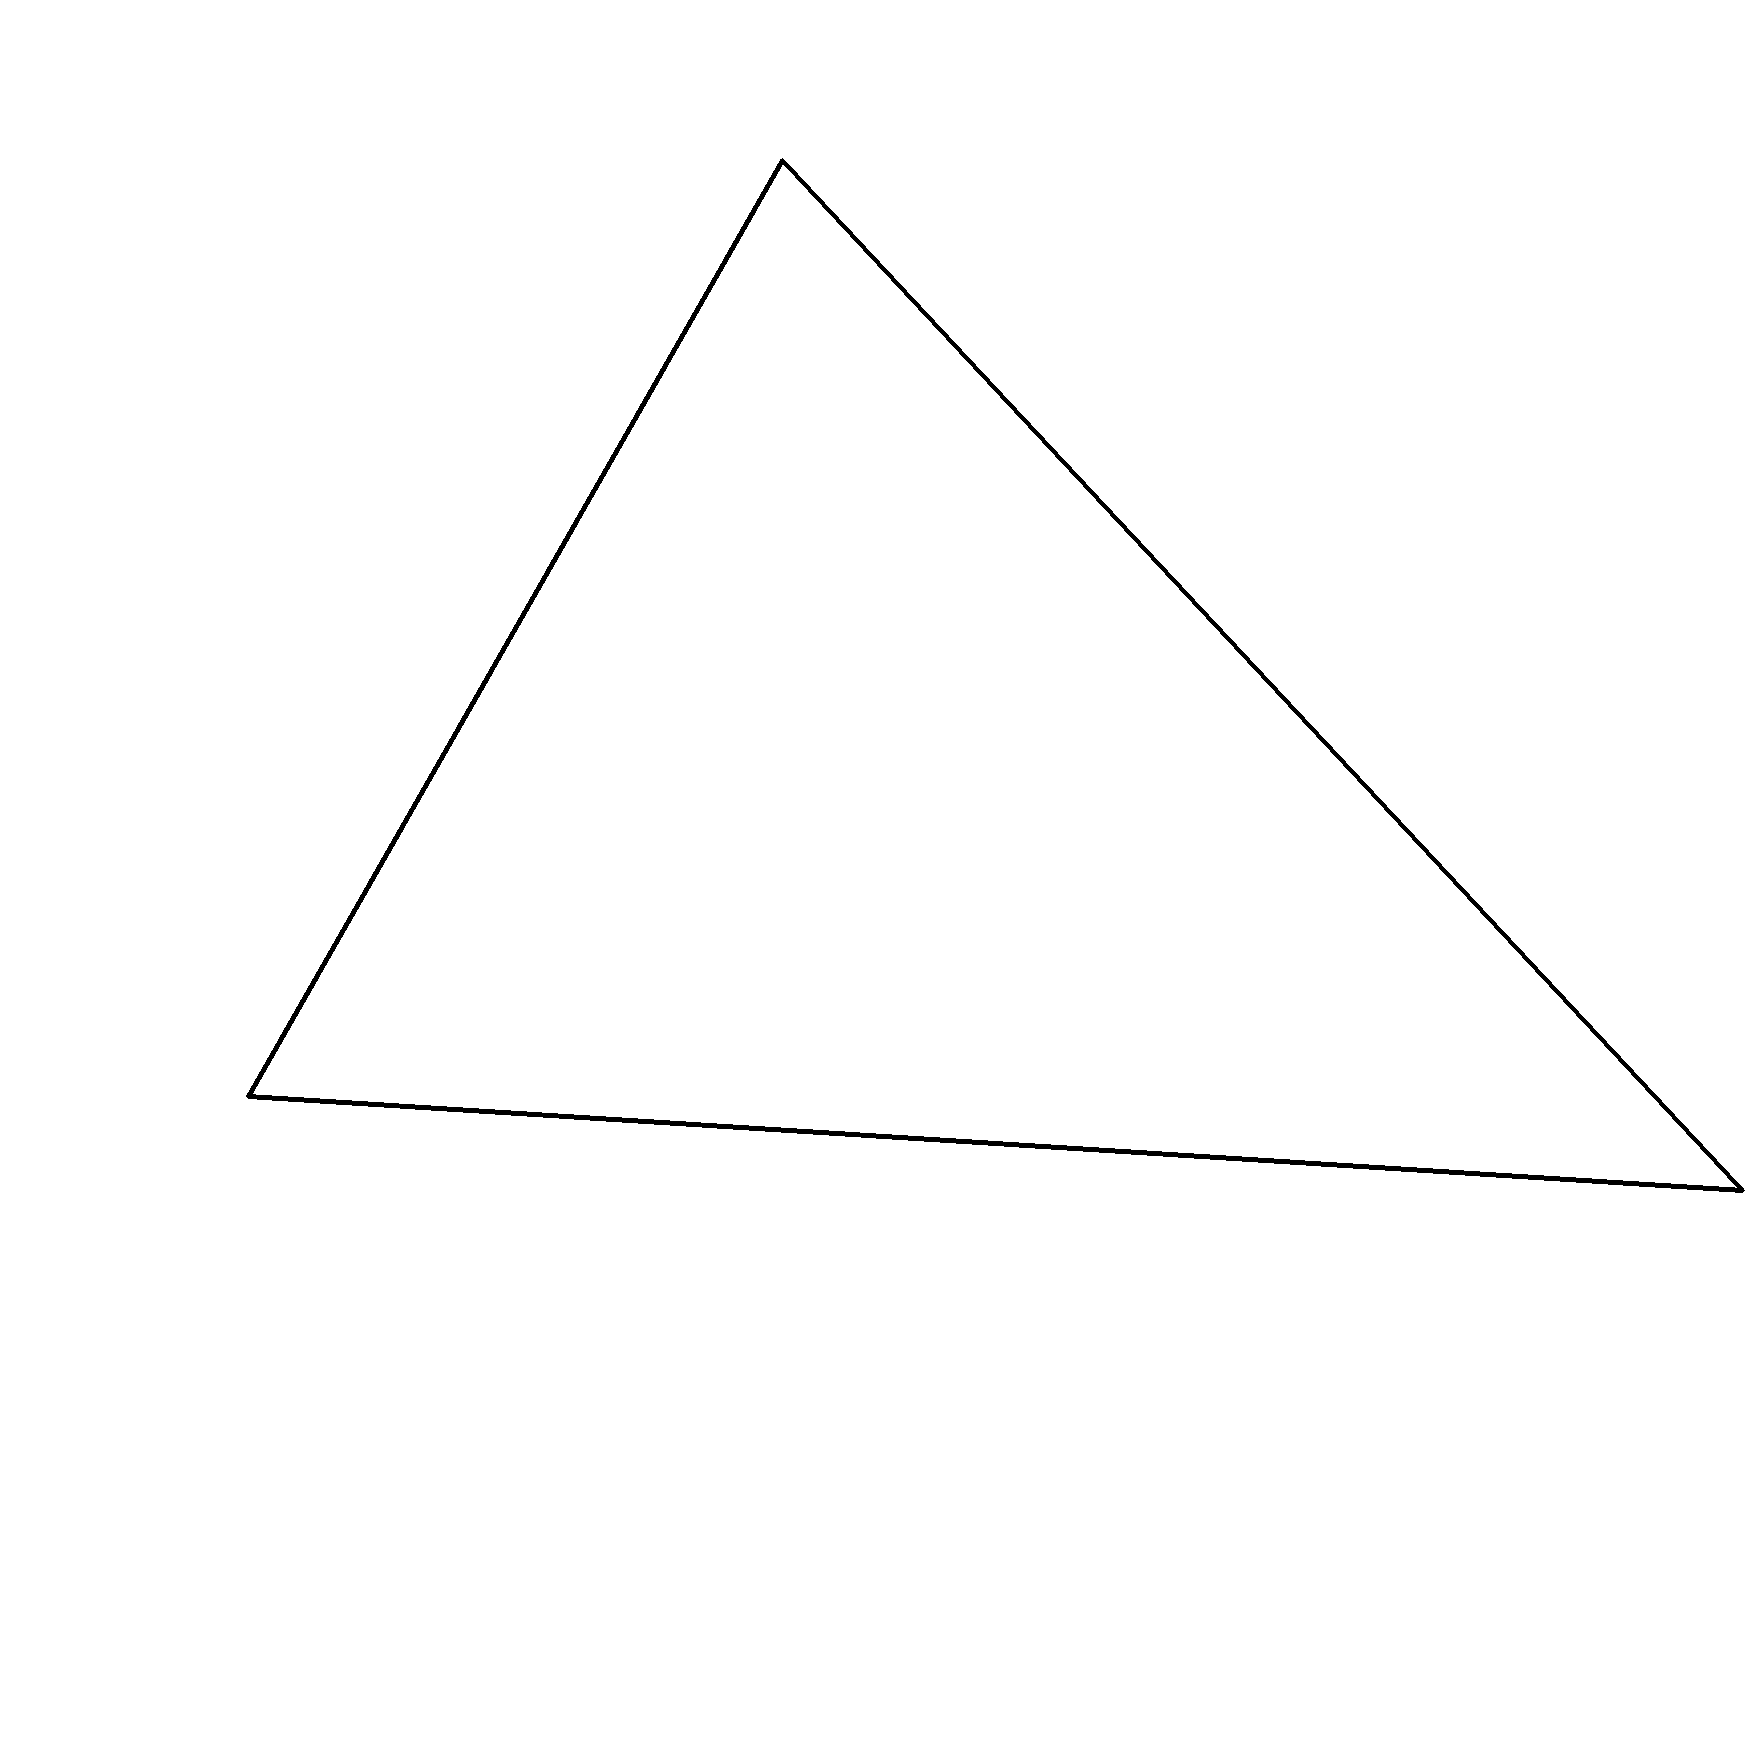

In [26]:
boundary = np.full(img.shape, 255, dtype='uint8')
perimeter = int(cv2.arcLength(cnt, True))
epsilon = 0.05 * perimeter
approx = cv2.approxPolyDP(cnt, epsilon, True)
cv2.drawContours(boundary, [approx], 0, (0, 0, 0), 3)
cv2.imwrite('0,05.png', boundary)
Image.fromarray(boundary)

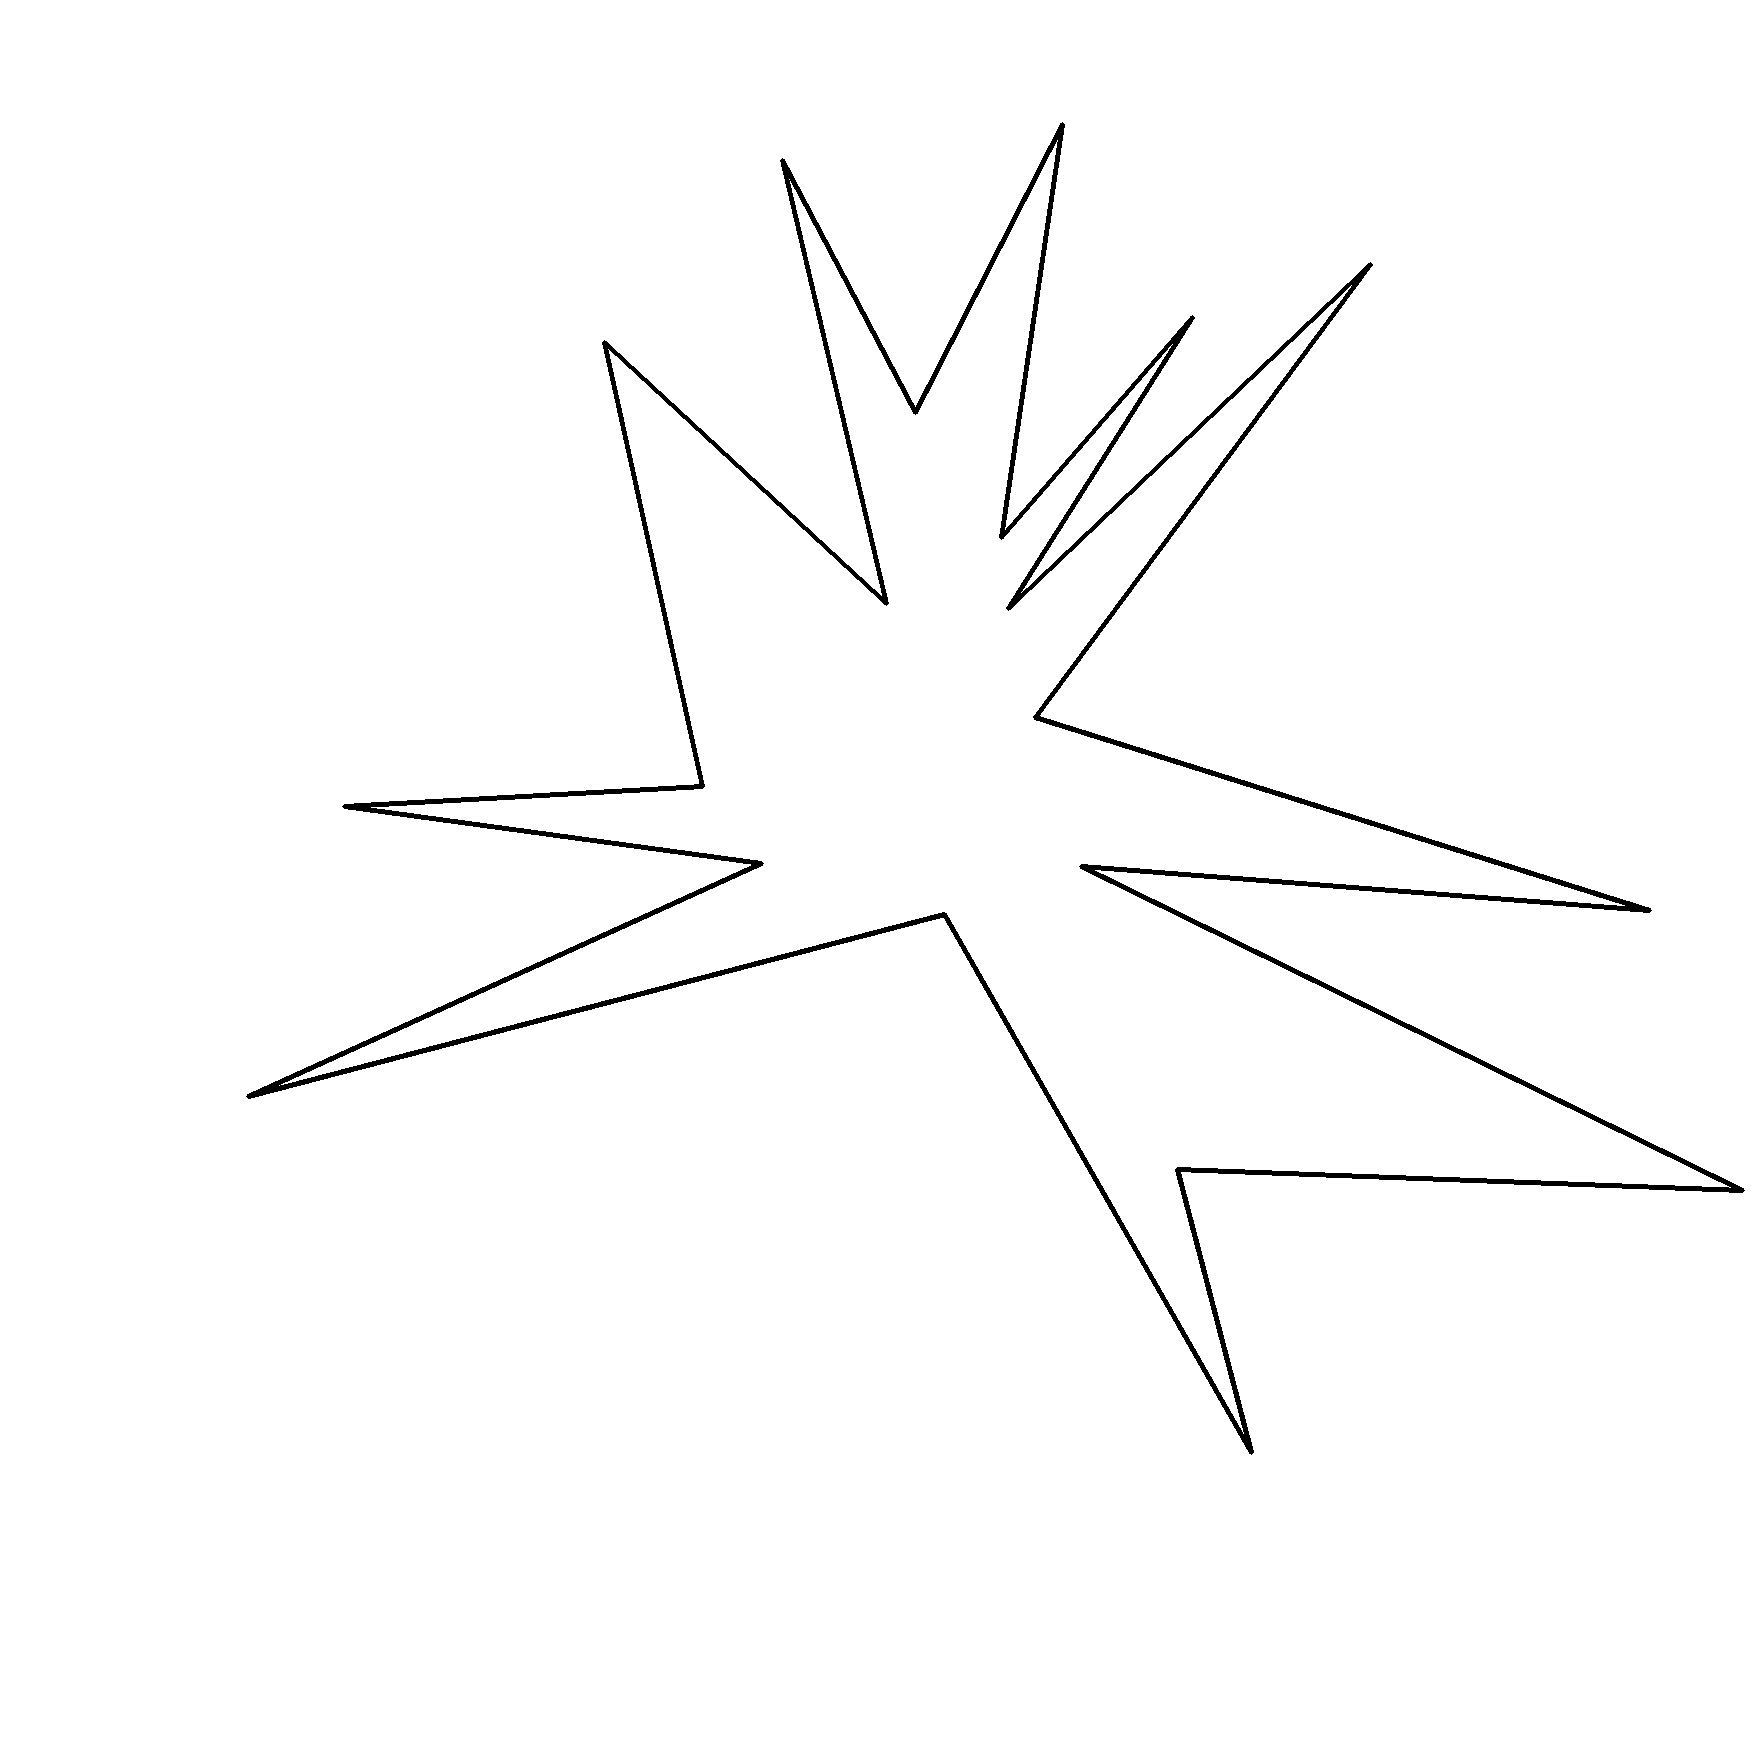

In [25]:
boundary = np.full(img.shape, 255, dtype='uint8')
perimeter = int(cv2.arcLength(cnt, True))
epsilon = 0.01 * perimeter
approx = cv2.approxPolyDP(cnt, epsilon, True)
cv2.drawContours(boundary, [approx], 0, (0, 0, 0), 3)
cv2.imwrite('0,01.png', boundary)
Image.fromarray(boundary)

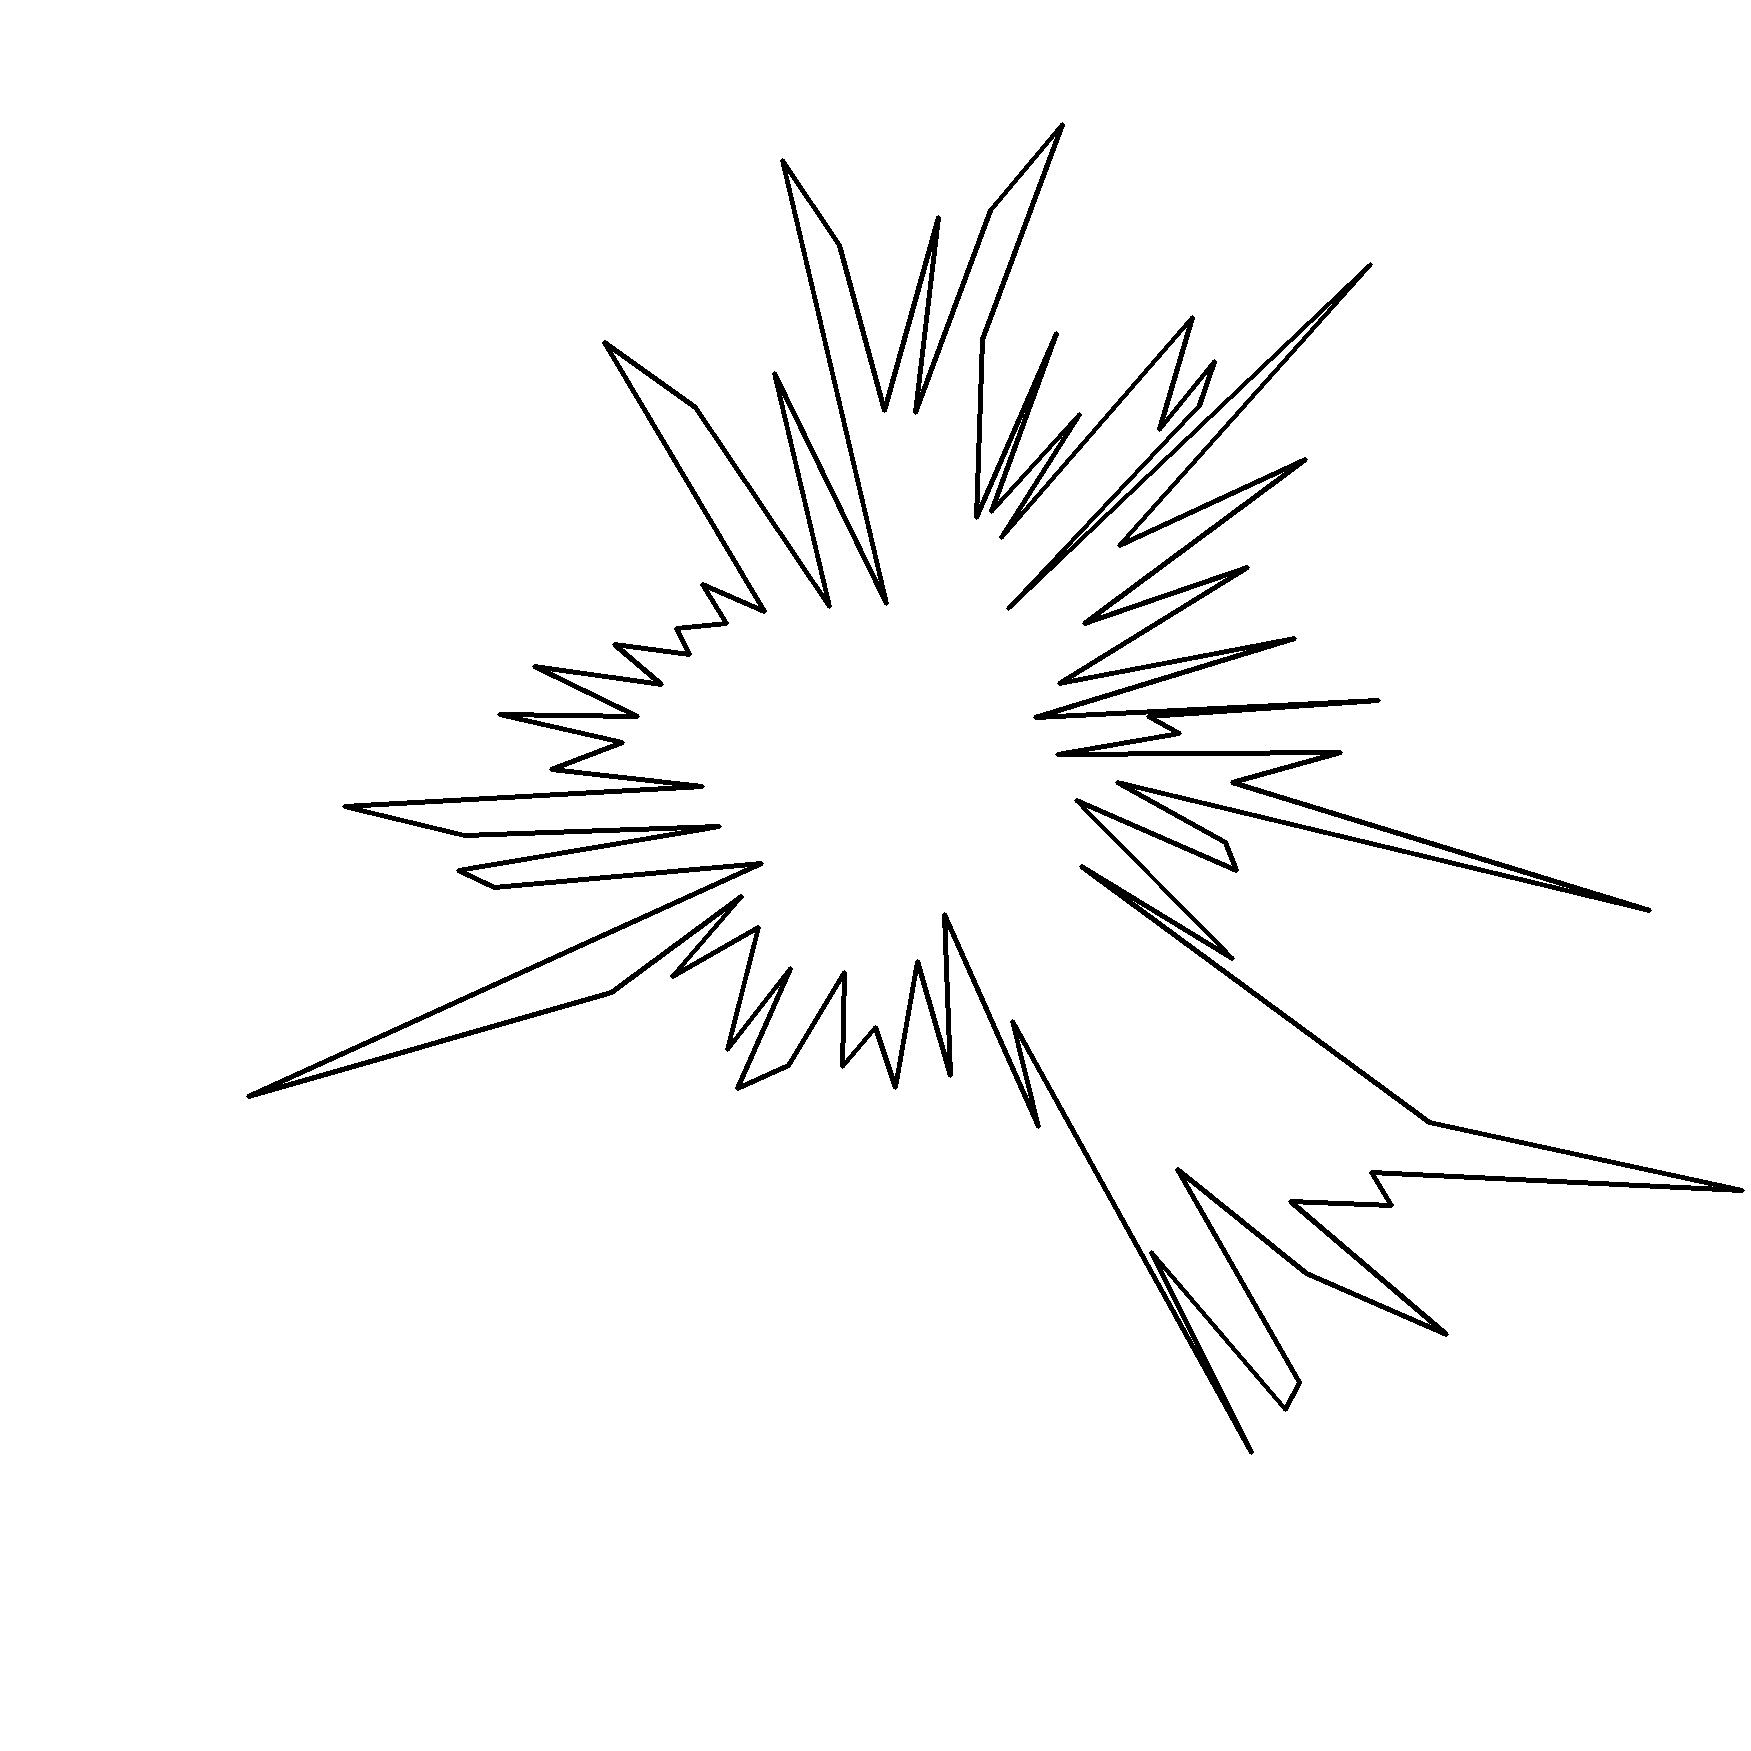

In [24]:
boundary = np.full(img.shape, 255, dtype='uint8')
perimeter = int(cv2.arcLength(cnt, True))
epsilon = 0.001 * perimeter
approx = cv2.approxPolyDP(cnt, epsilon, True)
cv2.drawContours(boundary, [approx], 0, (0, 0, 0), 3)
cv2.imwrite('0,001.png', boundary)
Image.fromarray(boundary)